# ACTIVIDAD 1. ÁRBOL BINARIO - GONZALO MIGUEL GÓMEZ DEL HIERRO

Incluimos algunos objetos que nos serán de utilidad más adelante.

In [1]:
class Cola:

    def __init__(self,tipo):
        """Constructor crea atributos privados"""
        self.__cola=list()
        self.__tipo=tipo
       
    def estaVacia(self):
        """Operación de consulta: comprueba si la cola está vacía"""
        return not self.__cola
    
    def primero(self):
        """Operación de consulta: devuelve el primer elemento de la cola
        Eleva  una excepción si está vacía"""
        try:
            return self.__cola[0]
        except:
            return None
       
            
    def encolar(self,elemento):
        """Operación de modificación: inserta un elemento al final
        Eleva  una excepción si el elemento no es del tipo de la cola"""
        if type(elemento)==self.__tipo:
            self.__cola.append(elemento)
            return
        else: 
            raise TypeError
        
    def desencolar(self):
        """Operación de modificación: elimina el primer elemento"""
        try:
            return self.__cola.pop(0)
        except:
            None
            
    def __str__(self):
        """Convierte la cola en lista para poderla visualizar"""
        return str(self.__cola)
class Pila:
    """
    TAD Pila
    """
    def __init__(self,tipo):
        """Constructor crea atributos privados"""
        self.__pila=list()
        self.__tipo=tipo
       
    def estaVacia(self):
        """Operación de consulta: comprueba si la pila está vacía"""
        return not self.__pila
    
    def cima(self):
        """Operación de consulta: devuelve la  cima de la pila
        Eleva  una excepción si está vacía"""
        try:
            return self.__pila[-1]
        except:
            return None
       
            
    def apilar(self,elemento):
        """Operación de modificación: inserta un elemento en la cima
        Eleva  una excepción si el elemento no es del tipo de la pila"""
        if elemento is None:
            pass
        elif type(elemento)==self.__tipo:
            self.__pila.append(elemento)
            return
        else: 
            raise TypeError
        
    def desapilar(self):
        """Operación de modificación: elimina y devuelve la cima
        Eleva  una excepción si el elemento no es del tipo de la pila"""
        try:
            return self.__pila.pop()
        except:
            None
            
    def __str__(self):
        """Convierte la pila en lista para poderla visualizar"""
        return str(self.__pila)

Se proporciona la siguiente clase árbol binario ordenado y se pide proporcionar casos de prueba para todos los argumentos.

In [2]:
class ArbolBinarioOrdenado:

    def __init__(self):
        self._raiz = None
        self._arbolIzdo = None
        self._arbolDcho = None

    def raiz(self):
        return self._raiz

    def arbolIzdo(self):
        return self._arbolIzdo

    def arbolDcho(self):
        return self._arbolDcho

    def estaVacio(self):
        return self._raiz is None

    def insertar(self, elemento):
        if self.estaVacio():
            self._raiz = elemento
            self._arbolIzdo = ArbolBinarioOrdenado()
            self._arbolDcho = ArbolBinarioOrdenado()
        elif elemento <= self._raiz:
            self._arbolIzdo.insertar(elemento)
        elif elemento > self._raiz:
            self._arbolDcho.insertar(elemento)

    def tieneElemento(self, elemento):
        if self.estaVacio():
            return False
        elif self._raiz == elemento:
            return True
        elif elemento < self._raiz:
            return self._arbolIzdo.tieneElemento(elemento)
        else:
            return self._arbolDcho.tieneElemento(elemento)

    def numElementos(self):
        if self.estaVacio():
            return 0
        else:
            return 1 + self._arbolIzdo.numElementos() + self._arbolDcho.numElementos()

    def preOrden(self):
        if self.estaVacio():
            return []
        l = [self._raiz]
        l += self._arbolIzdo.preOrden()
        l += self._arbolDcho.preOrden()
        return l

    def inOrden(self):
        if self.estaVacio():
            return []
        l = self._arbolIzdo.inOrden()
        l.append(self._raiz)
        l += self._arbolDcho.inOrden()
        return l


Nótese que la lógica para insertar elementos recurre a un orden. Esto se traduce en el orden de la recta real si los elementos fueran números, el orden lexicográfico si fueran cadenas de texto, el orden componente a componente si fueran arrays numéricos, etc. Es importante entender que significa ese orden a la hora de entender cómo se almacena la información en el árbol. El ejemplo con el que voy a trabajar es de números enteros, por ser lo más sencillo.

En primer lugar, generemos una instancia vacía de la clase ArbolBinarioOrdenado, y a través de ella desarrollemos los casos de prueba:

In [3]:
prueba_arbol=ArbolBinarioOrdenado()
# Comprobemos que el árbol está efectivamente vacío mediante el método estaVacio (devolverá valor True)
print(prueba_arbol.estaVacio())

True


In [4]:
# Insertemos un elemento con el método insertar (como es el primero, este elemento irá a parar a la raíz,
# y se generarán instancias de la clase vacías pra los árboles izquierdo y derecho
prueba_arbol.insertar(5)

In [5]:
# Comprobemos que ahora el árbol tiene el elemento a, que es la raíz y que los árboles izquierdo y derecho
# están vacíos
prueba_arbol.tieneElemento(5)

True

In [6]:
prueba_arbol.raiz()

5

In [7]:
prueba_arbol.arbolDcho().estaVacio()

True

In [8]:
prueba_arbol.arbolIzdo().estaVacio()

True

In [9]:
# Insertemos ahora dos elementos, uno que sabemos que irá al árbol izquierdo, y otro que sabemos que irá 
# al derecho.
prueba_arbol.insertar(3) # irá al izdo
prueba_arbol.insertar(7) # irá al dcho

In [10]:
# Veamos que efectivamente ahora los árboles izdo y dcho son respectivamente el 3 y el 7 (de una manera 
# un poco bruta)
# Árbol Izquierdo:
# Veamos que la raíz es 3, y que respectivamente los árboles izdo y dcho que penden de él están vacíos
arb_izd = prueba_arbol.arbolIzdo()
arb_izd.raiz()

3

In [11]:
# Veamos que el subárbolizquierdo y el subárbol derecho de este árbol izdo están vacíos
arb_izd.arbolIzdo().estaVacio() and arb_izd.arbolDcho().estaVacio()

True

In [12]:
# Hagamos lo mismo con el árbol derecho de nuestro árbol principal
arb_dcho = prueba_arbol.arbolDcho()
arb_dcho.raiz()

7

In [13]:
arb_dcho.arbolIzdo().estaVacio() and arb_dcho.arbolDcho().estaVacio()

True

In [14]:
# A estas alturas nuestro árbol prueba_arbol tiene 3 elementos
prueba_arbol.numElementos()

3

In [15]:
# Ahora recorramos con los métodos de preOrden e inOrden el árbol construido
# PreOrden 
prueba_arbol.preOrden()

[5, 3, 7]

In [16]:
# InOrden
prueba_arbol.inOrden()

[3, 5, 7]

La implementación proporcionada para el árbol es recursiva, es decir, se hace de forma que todos los nodos del árbol son árboles en sí mismos, y todos los métodos se llaman a sí mismos de manera que se aprovecha el diseño para recorrer el árbol para cualquier tarea.

Se piden implementaciones iterativas para recorrer el árbole en pre-orden, in-orden y amplitud, empleando para ello las estructuras pila y cola proporcionadas.

Vamos a hacer nuestro árbol un poco más grande insertando algunos números más:

In [17]:
prueba_arbol.insertar(2)
prueba_arbol.insertar(4)
prueba_arbol.insertar(6)
prueba_arbol.insertar(8)
prueba_arbol.insertar(9)
prueba_arbol.insertar(1)

In [18]:
prueba_arbol.preOrden()

[5, 3, 2, 1, 4, 7, 6, 8, 9]

In [19]:
prueba_arbol.inOrden()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
# IMPLEMENTACIÓN ITERATIVA DEL RECORRIDO EN PREORDEN USANDO UNA PILA
def preOrden_iter(tree: ArbolBinarioOrdenado):
    if not isinstance(tree, ArbolBinarioOrdenado):
        raise TypeError
    pila = Pila(ArbolBinarioOrdenado)
    pila.apilar(tree)
    num_iter=0
    l = list()
    while not pila.estaVacia():
        aux = pila.desapilar()        
        l.append(aux.raiz())
        # Es fundamental el orden en el que apilamos los subárboles, para que al ir desapilando vayamos 
        # recorriendo el árbol de la manera deseada
        # Evitamos apilar árboles vacíos
        if not aux.arbolDcho().estaVacio():
            pila.apilar(aux.arbolDcho())
        if not aux.arbolIzdo().estaVacio():
            pila.apilar(aux.arbolIzdo())
        num_iter += 1
    return l, num_iter

# IMPLEMENTACIÓN ITERATIVA DEL RECORRIDO EN INORDEN USANDO UNA PILA
def inOrden_iter(tree: ArbolBinarioOrdenado):
    if not isinstance(tree, ArbolBinarioOrdenado):
        raise TypeError
    pila = Pila(ArbolBinarioOrdenado)
    aux = tree
    l = list()
    num_iter = 0
    while len(l) < tree.numElementos():  
        if not aux.estaVacio():
            pila.apilar(aux)
            aux = aux.arbolIzdo()
        else:
            aux2 = pila.desapilar()
            l.append(aux2.raiz())
            aux = aux2.arbolDcho()
        num_iter += 1
    return l, num_iter

# IMPLEMENTACIÓN DEL RECORRIDO EN AMPLITUD USANDO EL TAD COLA
def amp_iter(tree: ArbolBinarioOrdenado):
    if not isinstance(tree, ArbolBinarioOrdenado):
        raise TypeError
    cola = Cola(ArbolBinarioOrdenado)
    aux = tree
    l = list()
    cola.encolar(aux)
    num_iter=0
    while not cola.estaVacia():
        aux = cola.desencolar()
        # Evitamos encolar árboles vacíos
        if not aux.arbolIzdo().estaVacio():
            cola.encolar(aux.arbolIzdo())
        if not aux.arbolDcho().estaVacio():
            cola.encolar(aux.arbolDcho())
        l.append(aux.raiz())
        num_iter += 1
    return l, num_iter

### IMPLEMENTACIÓN
Algunos comentarios sobre la implementación:
En todos los casos se ha incluido una comprobación sobre el objeto que le estamos pasando a la función, y en el caso de que no sea una instancia de la clase ArbolBinarioOrdenado, se devuelve un error.

1- Recorrido en pre-orden:
    Se ejecuta el bloque de código mientras la pila no esté vacía (al iniciar el bucle ya le hemos insertado el árbol). Las pila se define para almacenar árboles, puesto que al desapilar el árbol más reciente (aunque solo añadimos a la lista la raíz del árbol, nos hace falta apilar de nuevo sus árboles derecho e izquierdo (en ese orden), para que al desapilar se devuelvan los nodos de izquierda a derecha.

    
2- Recorrido en in-orden:
    Por cómo se ha implementado, en este caso no se puede poner como condición de salida que la pila esté vacía, puesto que cuando desapilasemos el árbol original y antes de apilar su hijo derecho, la pila estaría vacía, y nos saldríamos del bucle. Es por esto que se ha impuesto la condición de haber recogido en la lista l todos los elementos del árbol. En este caso vamos apilando bajando siempre por la rama izquierda, y cuando llegamos al final, quitamos el último elemento que hemos incluido (añadimos su raíz a la lista) y comprobamos la rama derecha devolviendo los nodos según los vamos recibiendo. Es más sencillo de entender si pensamos en ordenar de menor a mayor (siempre queremos dar los elementos más pequeños antes). En el caso de ir por las ramas de la izquierda, al avanzar, vamos hacia elementos más pequeños, por eso tenemos que ir hasta lo más profundo antes de empezar a añadir los elementos a nuestro output, mientras que al recorrer las ramas yendo por los hijos de la derecha, vamos yendo hacia tamaño mayor, por eso tenemos que añadir los elementos a nuestro output antes de apilar los hijos de la derecha.

    
3- Recorrido en amplitud:
Se usa la cola porque en este caso queremos devolver los elementos por niveles de arriba hacia abajo (al desencolar extraemos el elemento más "antiguo", que se corresponderá con los niveles superiores, o dentro del mismo nivel, con los elementos que estén más a la izquierda, por eso encolamos primero el hijo izquierdo y luego el derecho).  

Tanto en el recorrido en pre-orden como en el recorrido en amplitud ha sido necesario comprobar explícitamente que los árboles hijos no estuvieran vacíos, puesto que sino añadiríamos 'Nones' a la lista.
### COSTE
Viendo las implementaciones hechas, uno puede ver que en el recorrido en preorden y en amplitud en cada ejecución del bucle while se extrae un elemento, luego el número de veces que se ejecuta el bucle debería ser exactamente el número de nodos que haya en el árbol. 

Para la ejecución en in-orden, por otro lado, esto no es así, porque antes de sacar un elemento tenemos que llegar a lo más profundo de la rama. En el ejemplo que estamos usando, antes de extraer un elemento, tendríamos que dar 4 pasos (para llegar al nodo más profundo yendo solo por el árbol izquierdo). En este caso, sacar el número de iteraciones a ojo parece difícil, así que posteriormente haremos un poco de análisis.

Probemos los métodos impolementados con el árbol de prueba construido:

In [21]:
##### PRE ORDEN #####
l1, niter = preOrden_iter(prueba_arbol)
print(l1)
print('Número de iteraciones: {}'.format(niter))

[5, 3, 2, 1, 4, 7, 6, 8, 9]
Número de iteraciones: 9


In [22]:
# Veamos que es igual que el método recursivo dado
l1 == prueba_arbol.preOrden()

True

In [23]:
##### IN ORDEN #####
l2, niter = inOrden_iter(prueba_arbol)
print(l2)
print('Número de iteraciones: {}'.format(niter))

[1, 2, 3, 4, 5, 6, 7, 8, 9]
Número de iteraciones: 18


In [24]:
# Veamos que es igual que el método recursivo dado
l2 == prueba_arbol.inOrden()

True

In [25]:
#### RECORRIDO EN AMPLITUD ####
l3, niter = amp_iter(prueba_arbol)
print(l3)
print('Número de iteraciones: {}'.format(niter))

[5, 3, 7, 2, 4, 6, 8, 1, 9]
Número de iteraciones: 9


Vamos a realizar un breve análisis sobre el coste (número de iteraciones y tiempo) para áboles de distintos tamaños generados de manera aleatoria. 

Con los resultados expuestos a continuación, se ve que tanto para pre-orden como para amplitud el número de iteraciones es exactamente el número de elementos del árbol (coste $\mathcal{O}(n)$), mientras que para el recorrido en in-orden, el número de iteraciones es exactamente el doble que nodos tiene el árbol (coste $\mathcal{O}(n)$ igualmente).

Se ve que el coste en el caso de in-orden es mayor (el doble en cada caso), pero no escala de manera más rápida con la dimensión de las listas (como sería una exponencial o un factorial), luego el coste de los tres métodos es comparable (número de iteraciones dividido por dimensión está acotado cuando dimensión tiende a infinito).

La relación entre los costes temporales no es análoga sin embargo, donde aparentemente el tiempo que tardamos en ordenar usando el método de in-orden crece mucho más rápido(parecería un polinomio de mayor grado sobre la dimensión), mientra que el coste temporal de pre-orden y amplitud se mantiene insignificante en la escala representada.

In [51]:
from time import time
import random
import numpy as np
import matplotlib.pyplot as plt
# fijamos la semilla por comodidad
random.seed(200)

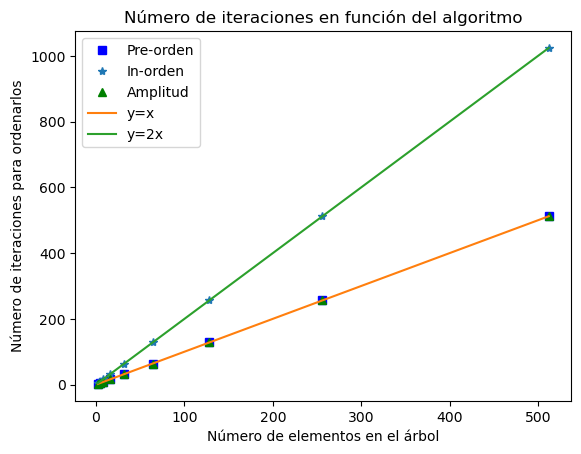

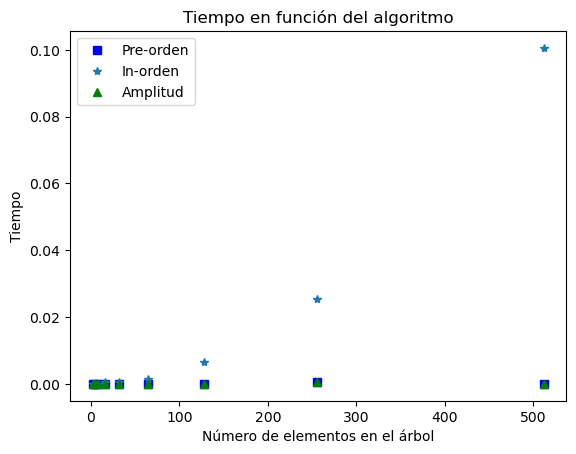

In [27]:
k = 9
dim = list()
n_iter = np.zeros(shape=(3,k))
t = np.zeros(shape=(3,k))
arb = ArbolBinarioOrdenado()
for i in range(k):
    n = 2 ** (i+1)
    dim.append(n)
    for j in range(arb.numElementos(), n):
        arb.insertar(random.random()*100000)
    # pre-orden
    t1 = time()
    l, niter = preOrden_iter(arb)
    t2 = time()
    n_iter[0,i] = niter
    t[0,i] = t2 - t1
    # in-orden
    t1 = time()
    l, niter = inOrden_iter(arb)
    t2 = time()
    n_iter[1,i] = niter 
    t[1,i] = t2 - t1
    # amplitud
    t1 = time()
    l, niter = amp_iter(arb)
    t2 = time()
    n_iter[2,i] = niter 
    t[2,i] = t2 - t1
plt.plot(dim, n_iter[0,...], 'bs', label='Pre-orden')
plt.plot(dim, n_iter[1,...], '*',label='In-orden')
plt.plot(dim, n_iter[2,...], 'g^',label='Amplitud')
plt.plot(dim,dim, label='y=x')
plt.plot(dim, [2 * dim[i] for i in range(k)], label='y=2x')
plt.xlabel('Número de elementos en el árbol')
plt.ylabel('Número de iteraciones para ordenarlos')
plt.title('Número de iteraciones en función del algoritmo')
plt.legend()
plt.show()
plt.plot(dim, t[0,...], 'bs', label='Pre-orden')
plt.plot(dim, t[1,...], '*',label='In-orden')
plt.plot(dim, t[2,...], 'g^',label='Amplitud')
plt.xlabel('Número de elementos en el árbol')
plt.ylabel('Tiempo')
plt.title('Tiempo en función del algoritmo')
plt.legend()
plt.show()

# ALGORITMO DE HUFFMAN

Lo primero que vamos a hacer es implementar una función que a partir de una cadena de caracteres, nos devuelva un diccionario relacionando cada elemento y su frecuencia de aparición:

In [28]:
def get_frequencies(chain):
    total = len(chain)
    counter = {}
    for letter in chain:
        # añadimos la letra al diccionario si es la primera vez que aparece
        if letter not in counter.keys():
            counter[letter] = 0
        counter[letter] += 1 / total
    return counter

Vamos a implementar dos clases: una clase Node y una clase HuffmanTree.
Los nodos instanciados a Node van a ser los elementos del árbol de Huffman. Estos nodos tienen una serie de atributos definidos pensando en su explotación dentro de la clase árbol. Por ejemplo, el atributo used es una bandera para saber si un nodo ha sido considerado ya o no dentro de la construcción del árbol; el atributo parent es para asignar a cada nodo el lugar en la lista que ocupa su padre (puesto que no estoy almacenando la información en un árbol al uso, sino que todo está almacenado en una lista, y en cada iteración, cuando construimos el nodo padre a partir de los dos nodos hijos, este se añade al final de la lista); el atributo encoding sirve para asignar, una vez construido el padre, qué nodo es el hijo de la derecha ("1") y qué nodo es el hijo de la izquierda ("0").

La clase HuffmanTree se inicializa con un diccionario de símbolos y frecuencias. Este diccionario se almacena en el atributo privado __probs. Después se genera una lista creando nodos para cada elemento del diccionario, almacenando la información de forma adecuada.

En el método __buildTree se construye de manera iterativa el árbol, generando nuevos nodos a partir de los nodos existentes y asignando las relaciones padre hijo, además de la etiqueta encoding para saber qué hijo sería el de la derecha y cuál el de la izquierda. Para escoger los nodos de menor probabilidad se ha implementado el método pop. Nótese que en este método se ha impuesto la condición de actualización "if self.Nodes[i].prob **<=** minProb", de manera que si hubiera varios símbolos con misma frecuencia, escogeríamos primero el que estuviera situado en un índice mayor dentro de la lista de nodos. La existencia de símbolos con frecuencias exactamente iguales rompe la unicidad de la codificación Huffman, puesto que un cambio de criterio en esta continuación o en la asignación del atributo encoding al nodo cuando ambos nodos tengan misma frecuencia, podría llevarnos a codificaciones Huffman distintas (se ilustrará sobre el ejemplo).

Se ha decidido hacer privados los métodos __initNodes y __buildTree y el atributo __probs porque son el núcleo fundamental del árbol, y no es conveniente que se puedan modificar desde fuera de la clase, puesto que podría perder consistencia el árbol construido al desalinear alguna de sus partes constituyentes.

Dentro del constructor de la clase se incluye la llamada al método buildEncodingDictionary, que símplemente llama de manera iterativa al método symbol_to_code, dando los símbolos del diccionario sobre el que se construye el árbol, ya que obtener la codificación Huffman es la finalidad del árbol, y a menudo (según he visto en varias referencias) el árbol se deshecha una vez obtenida la codificación.

El método symbol_to_code construye el código Huffman para un símbolo dado. Para ello buscamos en nuestra lista de nodos aquel que tenga el atributo symbol igual al argumento de entrada del método, y desandamos el camino hasta el nodo raíz, aprovechando que en cada nodo almacenamos (en el atributo parent) el índice que ocupa en la lista el nodo padre. Antes de devolver el código hay que darle la vuelta, puesto que nosotros desandamos el camino que construye el código, luego lo estamos "leyendo" al revés.

El método decode sirve para obtener un símbolo a través de un código (si no estamos llegando a una hoja, y el código aportado es el de un nodo intermedio, el símbolo devuelto será "", puesto que en esos nodos el atributo symbol mantiene el valor por defecto que le da el constructor de la clase Node). Para un código que sí corresponda a un nodo hoja, lo que hacemos es andar el camino desde el nodo raíz (que es el último almacenado en nuestra lista de nodos) buscando a los hijos (con el método search_son) que tengan el atributo encoding apropiado. Por ejemplo, si el código empieza por 1, buscamos los hijos del nodo raíz, y de ellos nos quedamos con el que tenga el atributo encoding igual a 1, y volvemos a iterar partiendo ahora de este hijo.

In [46]:
class Node:
    prob = 0.0
    symbol = ""
    encoding = ""
    used = False
    parent = -1 # se inicializa como -1 para ser coherente en los primeros hijos del nodo raíz
class HuffmanTree:
    
    def __init__(self, dict_probs):
        self.__probs = dict_probs
        self.Nodes = list()
        self.dictEncoder = {}
        self.__initNodes()
        self.__buildTree()
        # Construimos el diccionario de códigos directamente en la construcción del árbol
        self.buildEncodingDictionary()
        
    def __initNodes(self):
        """ Con este método almacenamos en objetos Node toda la 
            info de nuestro diccionario de frecuencias"""
        for key, value in self.__probs.items():
            node = Node()
            node.prob = value
            node.symbol = key
            self.Nodes.append(node)
            
    def __buildTree(self):
        """ Se construye el árbol con la máxima iterativa de ir emparejando los nodos de menor probabilidad
        para generar un nuevo nodo (padre de los dos anteriores)"""
        indexMin1 = self.pop()
        indexMin2 = self.pop()
        while indexMin1 != -1 and indexMin2 != -1: # si alguno fuera -1 estaríamos terminando
            node = Node()
            prob1 = self.Nodes[indexMin1].prob
            prob2 = self.Nodes[indexMin2].prob
            node.prob = prob1 + prob2
            self.Nodes.append(node) # este nodo se convierte en el padre de los dos nodos usados y se añade al final de la lista
            self.Nodes[indexMin1].parent = len(self.Nodes) - 1
            self.Nodes[indexMin2].parent = len(self.Nodes) - 1
            # Asignamos código 1 al nodo de menor probabilidad
            self.Nodes[indexMin1].encoding = "1"
            self.Nodes[indexMin2].encoding = "0"
            indexMin1 = self.pop()
            indexMin2 = self.pop()
            
    def pop(self):
        """ Este método sirve para extraer los nodos en orden de prioridad (menor prob a mayor). Al contrario que en las 
        pilas o colas usadas, no voy eliminando los nodos, por eso incluyo el atributo used, para saber cuáles
        he usado ya """
        minProb = 1.0 # para que asigne valores en la primera iteración
        indexMin = -1 # valor de control para el caso en el que llegamos a terminar, en el que no actualizamos nada
        for i in range(len(self.Nodes)):
            if self.Nodes[i].prob <= minProb and not self.Nodes[i].used:
                minProb = self.Nodes[i].prob
                indexMin = i
        if indexMin != -1:
            self.Nodes[indexMin].used = True
        return indexMin

    def symbol_to_code(self, a):
        """ Asignamos a un símbolo dado su código binario Huffman """
        found = False
        for i in range(len(self.Nodes)):
            if self.Nodes[i].symbol == a:
                found = True
                ind = i
                break
        encoding = ""
        if found:
            while ind != -1:
                encoding += self.Nodes[ind].encoding
                ind = self.Nodes[ind].parent
        else:
            return "unknown symbol"
        return encoding[::-1] # le damos la vuelta al código porque lo hemos leído de abajo a arriba

    def buildEncodingDictionary(self):
        for symbol in self.__probs.keys():
            self.dictEncoder[symbol] = self.symbol_to_code(symbol)
            
    def decode(self, code):
        parent = len(self.Nodes) - 1 # índice de la raíz del árbol 
        for side in code:
            index_son = self.search_son(parent, side)
            parent = index_son
        return self.Nodes[index_son].symbol        

    def search_son(self, parent: int, side: str):
        for i in range(len(self.Nodes)):
            if self.Nodes[i].parent == parent and self.Nodes[i].encoding == side:
                return i            
        raise Error('Código no encontrado')

Usemos nuestra implementación para obtener la codificación Huffman para el diccionario de frecuencias que aparece en el enunciado de la entrega:
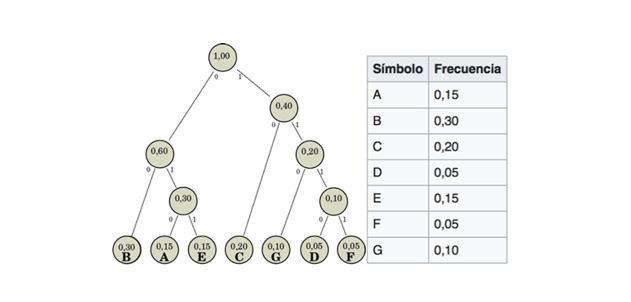

De la imagen del árbol es fácil extraer los códigos Huffman (recorriendo desde la raíz hasta la hoja del símbolo de interés), e.g., el código asociado a D es 1110.

In [47]:
probs_enunciado = {"A":0.15,"B":0.3,"C":0.2,"D":0.05,"E":0.15,"F":0.05,"G":0.1}
huffman1 = HuffmanTree(probs_enunciado)
# Mostremos el diccionario de codificación (que construimos directamente dentro del constructor de la clase).
huffman1.dictEncoder

{'A': '010',
 'B': '00',
 'C': '10',
 'D': '1110',
 'E': '011',
 'F': '1111',
 'G': '110'}

Es fácil comprobar que los códigos que hemos generado para cada símbolo efectivamente son los que obtendríamos siguiendo la imagen anterior. Veamos lo que comentaba sobre la unicidad cuando hay nodos con frecuencias exactamente iguales. Si aportamos el mismo diccionario, pero con los símbolos ordenados de otra manera, en particular, intercambiando el A y el E, el resultado obtenido es el siguiente:

In [48]:
probs_enunciado_cheat = {"E":0.15,"B":0.3,"C":0.2,"D":0.05,"A":0.15,"F":0.05,"G":0.1}
huffman1_cheat = HuffmanTree(probs_enunciado_cheat)
# Mostremos el diccionario de codificación (que construimos directamente dentro del constructor de la clase).
huffman1_cheat.dictEncoder

{'E': '010',
 'B': '00',
 'C': '10',
 'D': '1110',
 'A': '011',
 'F': '1111',
 'G': '110'}

Se puede observar que ahora los nodos "E" y "A" han intercambiado sus posiciones en el árbol. En un caso real en el que obtengamos un diccionario de frecuencias a partir de un texto largo, que las frecuencias de dos símbolos sean exactamente iguales parece bastante improbable, así que, aunque lo considero un defecto de diseño, no lo veo un problema grave.

 Aprovechemos el árbol generado para hacer uso de los métodos implementados, a modo de prueba.

In [49]:
# Pedimos el código asociado a un símbolo
symb = "G"
code = huffman1.symbol_to_code(symb)
print('El código asociado a {} es {}'.format(symb, code))
# Ahora hacemos la operación contraria
symb2 = huffman1.decode(code)
print('El símbolo asociado a {} es {}'.format(code, symb2))

El código asociado a G es 110
El símbolo asociado a 110 es G


En el último apartado de a práctica se pide obtener la codificación para una cadena de caracteres dada. Para ello usaremos la función get_frequencies.

In [50]:
chain = "Diseñar una clase árbol de Huffman con un método que construya el árbol a partir de un diccionario de símbolos con sus frecuencias. Puede usar como base un árbol binario, pero que no tiene que estar ordenado. Explique y justifique la implementación y estructuras usadas."
probs=get_frequencies(chain)
huffman_chain = HuffmanTree(probs)
huffman_chain.dictEncoder

{'D': '1011111',
 'i': '1100',
 's': '1000',
 'e': '111',
 'ñ': '10111100',
 'a': '0011',
 'r': '1001',
 ' ': '000',
 'u': '0100',
 'n': '1010',
 'c': '00101',
 'l': '01100',
 'á': '110100',
 'b': '11011',
 'o': '0101',
 'd': '01101',
 'H': '10111101',
 'f': '101100',
 'm': '001000',
 'é': '01111010',
 't': '01110',
 'q': '001001',
 'y': '110101',
 'p': '101101',
 'í': '01111011',
 '.': '101110',
 'P': '01111000',
 ',': '01111001',
 'E': '01111110',
 'x': '01111111',
 'j': '01111100',
 'ó': '01111101'}